## Step - 1 : Business Problem Understanding


* Indentify relationship between total advertising spend and sales
* Our next ad campaign will have a total spend of $200,000. What should be the unit sales projection?

## Step - 2 : Data Understanding

**Data**

This sample data displays sales for a particular product as a function of advertising budgets (in dollars) for TV, radio, and newspaper media.

##### Independent Variables

* TV: Advertising amount spent on TV marketing (in Dollars)
* Radio: Advertising amount spent on Radio marketing (in Dollars)
* Newspaper: Advertising amount spent on Newspaper marketing (in Dollars)

##### Target Variable

* Sales: Overall sales of product/service in a given market

##### Task

* Collect & Load Data
* Dataset Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


## Step - 3 : Data Preprocessing

* We need to find the total amount spent (Dollars) on individual market campaign.

In [5]:
df['Total Expenses'] = df['TV'] + df['radio'] + df['newspaper']
df

,TV,radio,newspaper,sales,Total Expenses
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000
...,...,...,...,...,...
195,38200,3700,13800,7600,55700
196,94200,4900,8100,9700,107200
197,177000,9300,6400,12800,192700
198,283600,42000,66200,25500,391800


In [6]:
# In order to indentify the relationship between total advertising spend and sales we need to remove other columns

In [7]:
df.drop(columns=['TV', 'radio', 'newspaper'], inplace=True)
df

,sales,Total Expenses
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


**Exploratory Data Analysis (EDA)**

In [8]:
df.describe()

,sales,Total Expenses
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


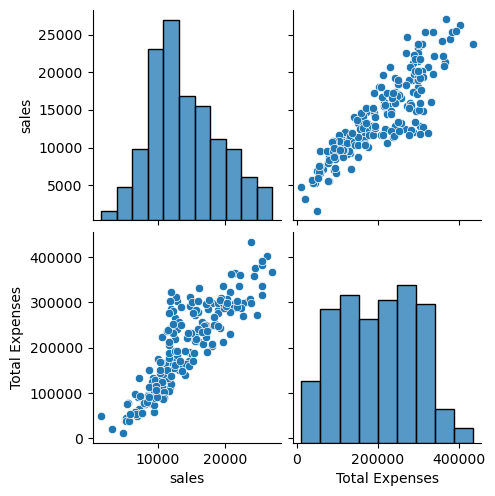

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.corr()

,sales,Total Expenses
sales,1.000000,0.867712
Total Expenses,0.867712,1.000000


In [11]:
df.isnull().sum()

sales             0
Total Expenses    0
dtype: int64

In [12]:
df.duplicated().sum()

0

**Checking if there is any wrong data-**

In [13]:
df['sales'].unique()

array([22100, 10400,  9300, 18500, 12900,  7200, 11800, 13200,  4800,
       10600,  8600, 17400,  9200,  9700, 19000, 22400, 12500, 24400,
       11300, 14600, 18000,  5600, 15500, 12000, 15000, 15900, 18900,
       10500, 21400, 11900,  9600,  9500, 12800, 25400, 14700, 10100,
       21500, 16600, 17100, 20700,  8500, 14900, 23200, 14800, 11400,
       10700, 22600, 21200, 20200, 23700,  5500, 23800, 18400,  8100,
       24200, 15700, 14000, 13400, 22300, 18300, 12400,  8800, 11000,
       17000,  8700,  6900, 14200,  5300, 12300, 13600, 21700, 15200,
       16000, 16700, 11200,  7300, 19400, 22200, 11500, 16900, 11700,
       17200, 19200, 19800, 21800, 14100, 12600, 12200,  9400,  6600,
        7000, 11600, 19700, 24700,  1600, 12700,  5700, 19600, 10800,
       20800, 10900, 20100, 10300, 16100, 15600,  3200, 15300, 14400,
       13300,  8000,  8400, 14500,  7600, 27000, 26200, 17600, 17300,
        6700,  9900,  5900, 25500], dtype=int64)

In [14]:
df['Total Expenses'].unique()

array([337100, 128900, 132400, 251300, 250000, 132600, 113800, 151400,
        11700, 223600,  96100, 242700, 124800, 112300, 283000, 296000,
       218400, 376800, 108000, 190300, 299500, 266000,  78700, 271400,
        93200, 285900, 184800, 279700, 298800, 127400, 364400, 168900,
       128700, 104500, 303300, 315700, 169800, 104900, 297700, 256400,
       249100, 323100, 241700,  94100, 229100, 135300, 299900, 292900,
       115400, 237500, 113600, 287500, 307400, 308300,  76800, 172000,
       298100, 249500,  76900, 358700, 282100, 140700, 202800,  79200,
        58300, 164000, 275900, 287900, 268400, 155800,  79100, 166400,
       251100, 150000,  49800, 163200,  44700, 146800, 125400, 280800,
       128100, 148500, 290300, 277300, 119800, 214500, 187200, 209000,
        63100, 310200, 359700, 132300, 247800, 207000, 227900, 383200,
       222800, 276500, 433600, 311700, 223000, 277800, 243300,  65700,
       113900,  39100, 287800, 290500, 302900, 193500, 240900, 159500,
      

## Step - 4 : Data Modelling

In [15]:
X= df[['Total Expenses']] #input variable should be in 2D format

y=df['sales']

**Train-Test Split**

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=16 )


**Simple Linear Regression ŷ = β₀ + β₁X**

In [77]:
from sklearn.linear_model import LinearRegression

# Save the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print Intercept and Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4370.6151911991965
Coefficients: [0.04799819]


## Step - 5 : Evaluation

**Mean Absolute Error (MAE) is the mean of the absolute value of the errors**

In [79]:
from sklearn.metrics import mean_absolute_error
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Test MAE: 1814.2576779681117


**Mean Squared Error (MSE) is the mean of the squared errors**

In [80]:
from sklearn.metrics import mean_squared_error
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

Test MSE: 5614304.684935944


**Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors**

In [81]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Test RMSE: 2369.452401913983


## Model Selection

**Checklist 1: Check whether model is good or either having overfitting/underfitting**

**Predictions**

In [83]:
# prediction on train data
y_pred_train = model.predict(X_train)

# Train R2
print("Train R2:", model.score(X_train, y_train))

Train R2: 0.7518562241233018


In [87]:
# prediction on test data
y_pred_test = model.predict(X_test)

# Test R2
print("Test R2:", model.score(X_test, y_test))

Test R2: 0.7571819153838115


**Checklist 2: Whether the Test Accuracy = Cross validation Score**

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

print("Cross Validation Score:", scores.mean())

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


**Checklist 3: Check for Assumptions**

In [89]:
# Calculate error (residuals)
error = y_test - y_pred_test

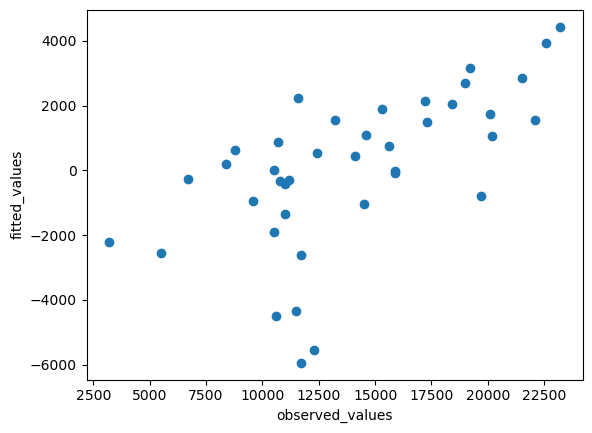

In [91]:
# Visualize the linearity of errors

import matplotlib.pyplot as plt

plt.scatter(y_test, error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**Normality of Errors**

In [92]:
# Check skewness of the error (for normality of errors)
error.skew()


-0.7201801005575459

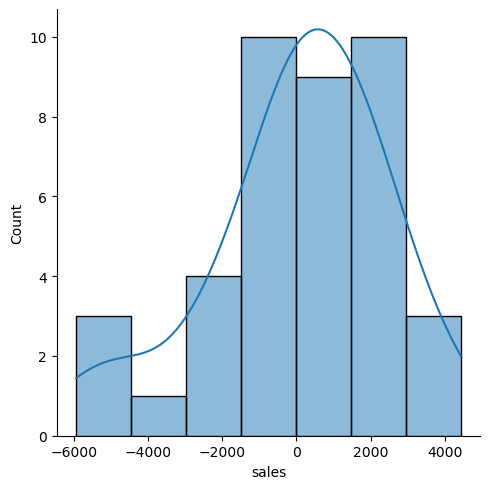

In [93]:
# Visualize the distribution of residuals
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(error, kde=True)
plt.show()


**Equal Variance of Errors (Homoscadesicity)**

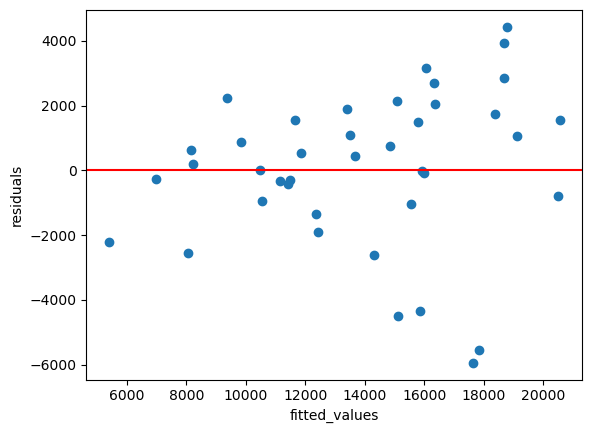

In [96]:
# Plot to check for homoscedasticity
plt.scatter(y_pred_test, error)
plt.axhline(y=0, color='red')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()


**Variables Significance**

In [98]:
import statsmodels.formula.api as smf

model2 = smf.ols("y ~ X", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           5.06e-62
Time:                        23:20:50   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final Model

In [99]:
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluation
print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))
print("Cross Validation Score:", cross_val_score(model, X, y, cv=5).mean())


Intercept: 4370.6151911991965
Coefficients: [0.04799819]
Train R2: 0.7518562241233018
Test R2: 0.7571819153838115
Cross Validation Score: 0.7433783178555419


* The Train R2, Test R2 and CV score all lie within +-5% tolerance level. Hence, this is a Good Model.

**Checking the Sales for the provided Ad-Spend**

In [100]:
# Create new data point for prediction

new_data = pd.DataFrame({"Total Expenses": [200000]})
new_data

,Total Expenses
0,200000


In [101]:
# Predict target variable for the new input

model.predict(new_data)

array([13970.25235278])

* We can project a sale of 13970 for an ad-spend of 200,000$

**Save the Model**

In [102]:
from joblib import dump

# Save the trained model to a file
dump(model, 'sales_model.joblib')

['sales_model.joblib']

**Load the Model and Predict**

In [103]:
from joblib import load

# Load the model from the file
loaded_model = load('sales_model.joblib')

# Use the loaded model to make a prediction
loaded_model.predict(new_data)

array([13970.25235278])